## Meeting 2
## Objectives
- Nail down final experiments.
- Discuss current results.
- Discuss how to fit the paper in the current literature, i.e., the research contribution.

----
### What does it mean for a model to be better?
- The mean? Median? It's known that that's not the golden quantity, but almost everyone does it anyways.
- Report score distributions. (Reimers and Guryvech, 2017)
- Stochastic dominance (transitivity holds)
- $Pr[X > Y] > 0.5$ (Dror et al., 2019; nontransitive)

----
## Experimental Setup
1. Train 3000-6000 models for each configuration, let them be the populations.
2. For any two methods, subsample 1000 samples of size << 3000.
3. Observe the type I error rate by comparing two.
4. Observe the type II error rate by subsampling within the same population.

### Methods
- Welch's t-test (one-tailed)
- Mann-Whitney U test (one-tailed)
- Almost stochastic dominance test (Dror et al., 2019)
- Bootstrapped permutation test

In [185]:
%cd ~/programming/sigtestv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import re

/home/ralph/programming/sigtestv


## BERT base on STS-B

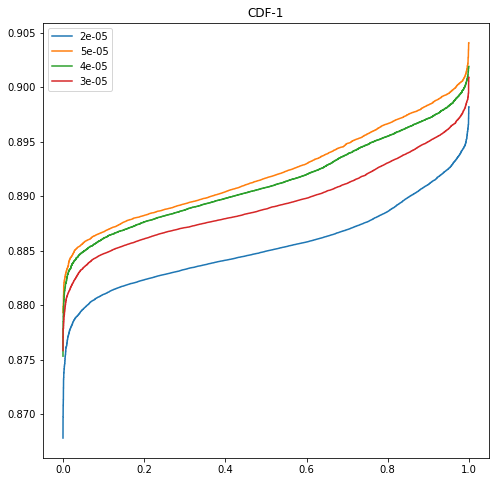

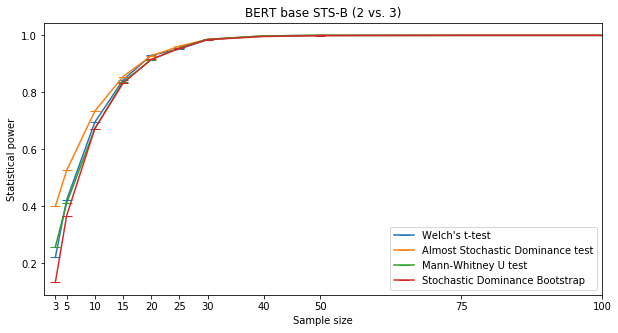

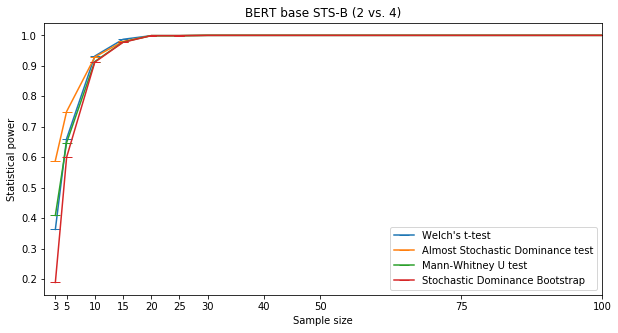

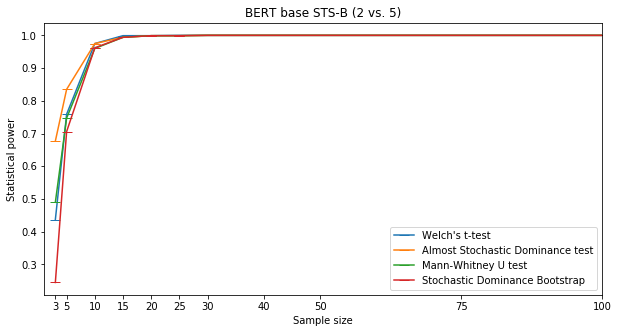

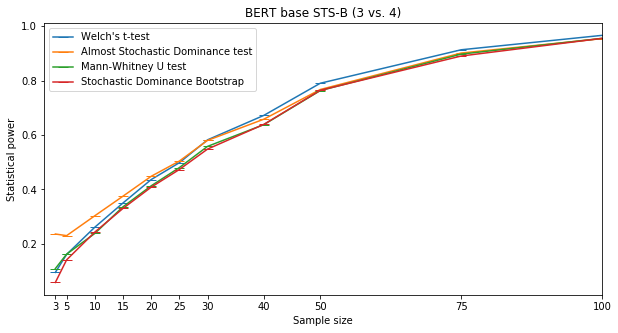

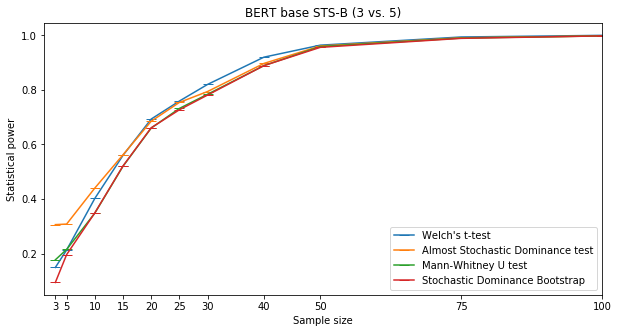

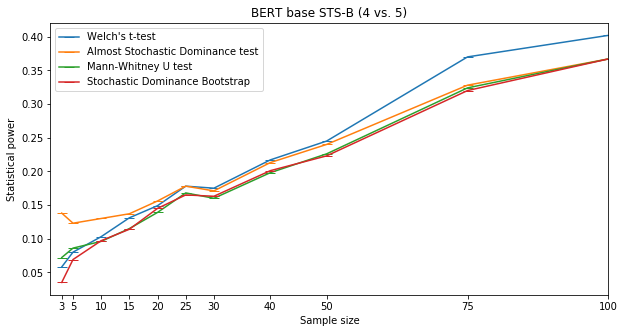

In [198]:
from collections import defaultdict
from itertools import product

def process_filenames(filenames):
    dfs = []
    for name in filenames:
        try:
            dfs.append((int(name.split('-')[3]), pd.read_csv(name, sep='\t', quoting=3)))
        except:
            pass
    return dfs

def plot_invcdfs(arrs, names, title='CDF-1'):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    for name, arr in zip(names, arrs):
        ax.step(np.linspace(0, 1, len(arr), endpoint=False), np.sort(arr), label=name)
    ax.legend()
    plt.title(title)
    plt.show()

def display_plots(df_data, xlim=None, title=None, test_type='power'):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    data = defaultdict(list)
    for n_samples, df in df_data:
        for idx, name, result in df.itertuples():
            data[name].append((n_samples, result))
    for name, tuples in data.items():
        tuples = sorted(tuples, key=lambda x: x[0])
        ax.plot(*list(zip(*tuples)), label=name, marker='_', markersize=10)
    plt.xticks([x[0] for x in dfs])
    if xlim: plt.xlim(*xlim)
    if title: plt.title(title)
    if test_type == 'power':
        plt.ylabel('Statistical power')
    else:
        ax.axhline(0.05, linestyle='--', color='r')
        plt.ylabel('Type 1 error rate')
    plt.xlabel('Sample size')
    ax.legend()
    plt.show()

result_dfs = list(map(lambda x: pd.read_csv(x, sep='\t'), glob.glob('data/bbase-sts-*05.tsv')))
plot_invcdfs([df['pearson'] for df in result_dfs], ('2e-05', '5e-05', '4e-05', '3e-05'))

for i in range(2, 6):
    for j in range(i + 1, 6):
        filenames = glob.glob(f'data/tests/bbase-sts-{i}{j}*-pr.tsv')
        display_plots(process_filenames(filenames),
                      xlim=(1, 100),
                      title=f'BERT base STS-B ({i} vs. {j})',
                      test_type='power')


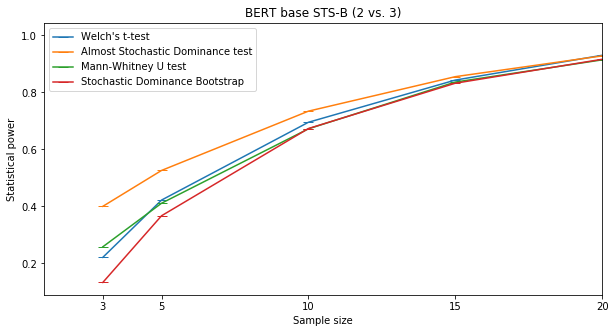

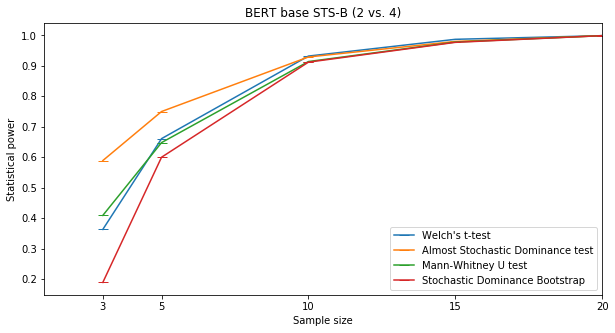

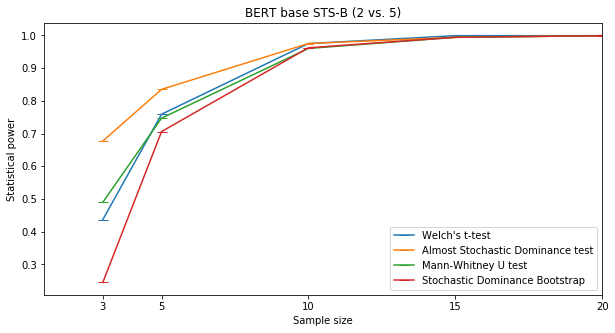

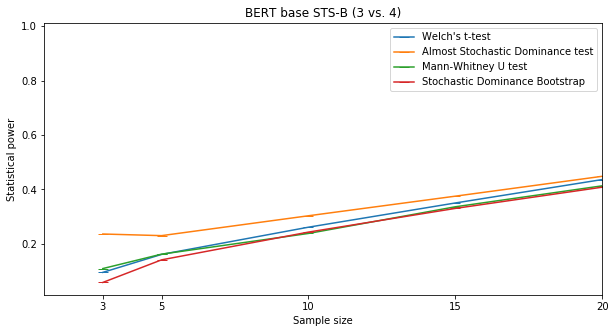

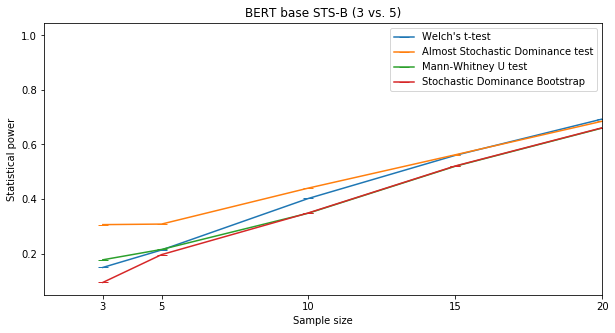

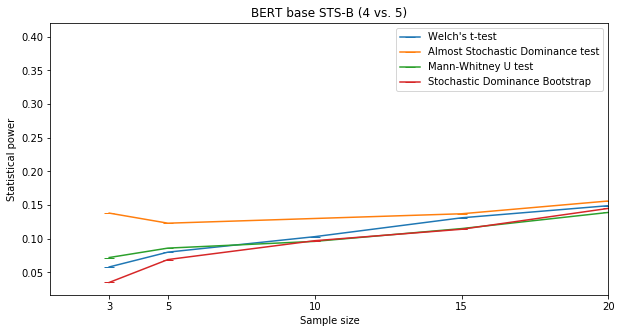

In [183]:
for i in range(2, 6):
    for j in range(i + 1, 6):
        filenames = glob.glob(f'data/tests/bbase-sts-{i}{j}*-pr.tsv')
        display_plots(process_filenames(filenames),
                      xlim=(1, 20),
                      title=f'BERT base STS-B ({i} vs. {j})',
                      test_type='power')

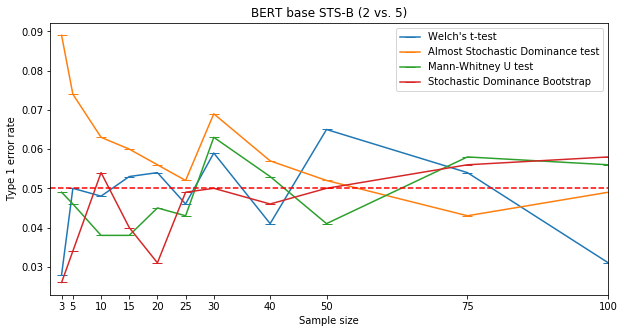

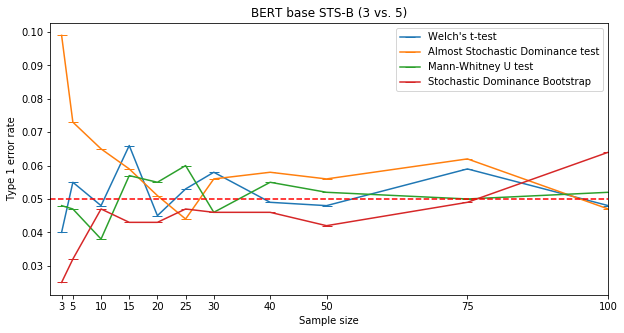

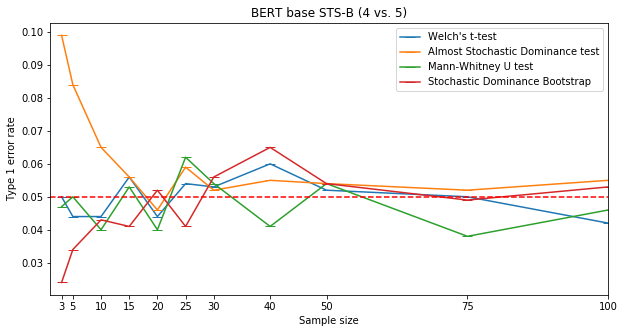

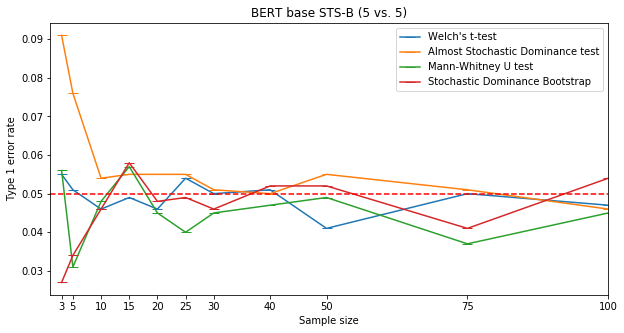

In [184]:
for i in range(2, 6):
    filenames = glob.glob(f'data/tests/bbase-sts-{i}*-t1.tsv')
    display_plots(process_filenames(filenames),
                  xlim=(1, 100),
                  title=f'BERT base STS-B ({i} vs. {j})',
                  test_type='type1')

## BiLSTM on STS-B

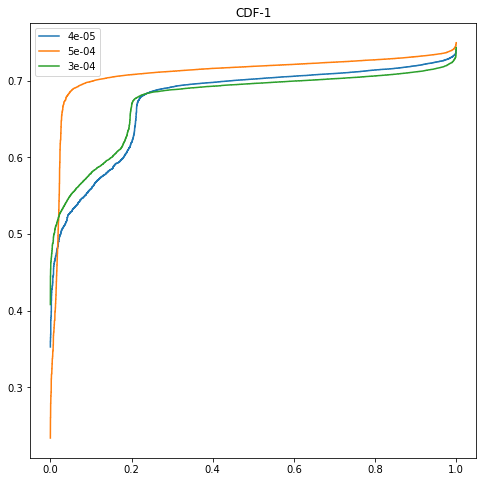

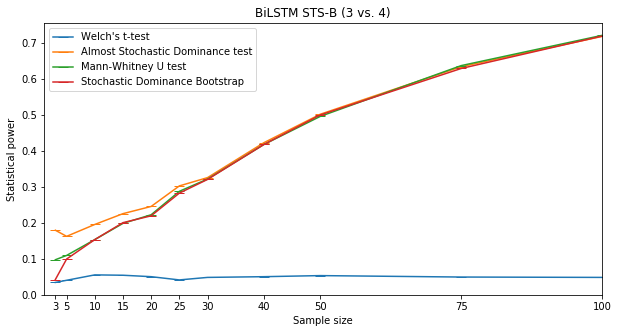

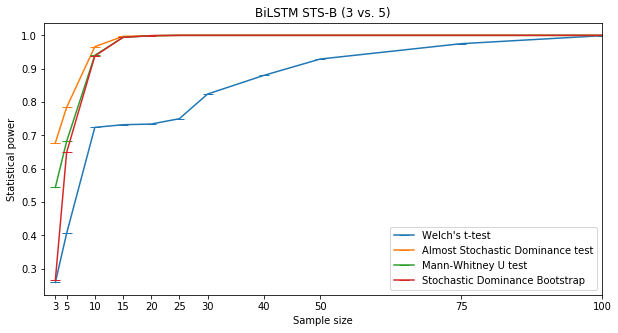

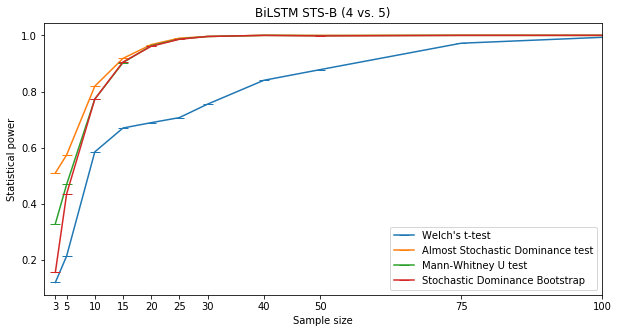

In [200]:
result_dfs = list(map(lambda x: pd.read_csv(x, sep='\t'), glob.glob('data/birnn-sts-*04.tsv')))
plot_invcdfs([df['pearsonr'] for df in result_dfs], ('4e-05', '5e-04', '3e-04'))

for i in range(3, 6):
    for j in range(i + 1, 6):
        filenames = glob.glob(f'data/tests/birnn-sts-{i}{j}*-pr.tsv')
        display_plots(process_filenames(filenames),
                      xlim=(1, 100),
                      title=f'BiLSTM STS-B ({i} vs. {j})',
                      test_type='power')

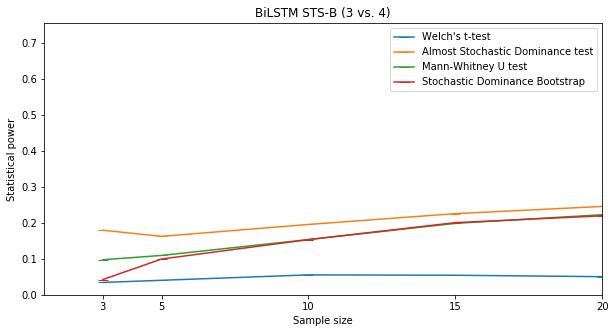

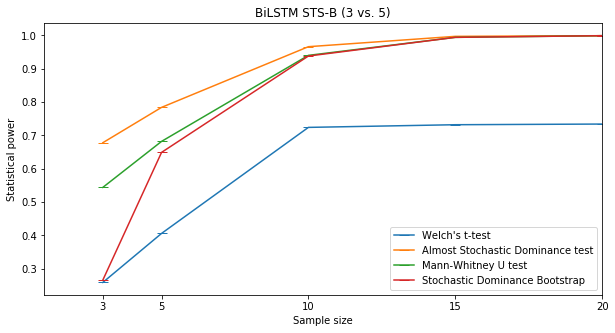

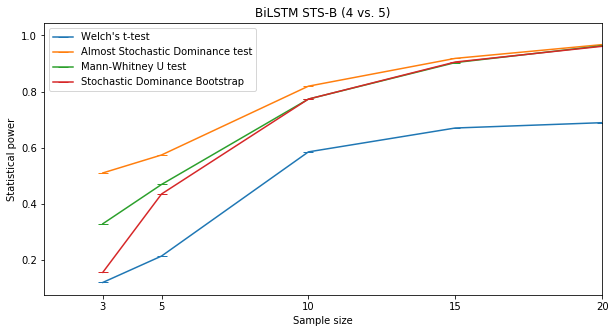

In [191]:
for i in range(3, 6):
    for j in range(i + 1, 6):
        filenames = glob.glob(f'data/tests/birnn-sts-{i}{j}*-pr.tsv')
        display_plots(process_filenames(filenames),
                      xlim=(1, 20),
                      title=f'BiLSTM STS-B ({i} vs. {j})',
                      test_type='power')

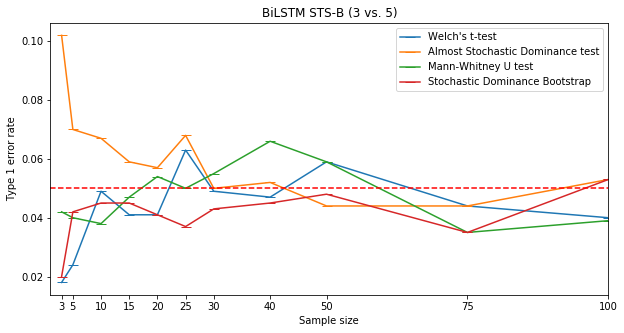

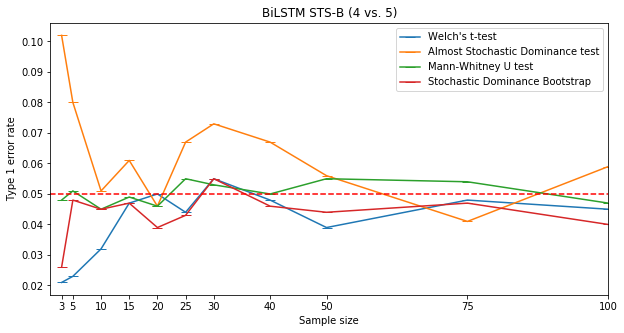

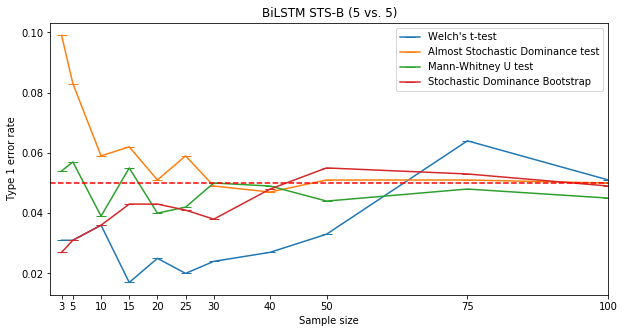

In [190]:
for i in range(3, 6):
    filenames = glob.glob(f'data/tests/birnn-sts-{i}-*-t1.tsv')
    display_plots(process_filenames(filenames),
                  xlim=(1, 100),
                  title=f'BiLSTM STS-B ({i} vs. {j})',
                  test_type='type1')

### Conclusions
- Almost stochastic dominance test has inflated type 1 error below samples of size 10-15.
- Almost stochastic dominance test has comparable statistical power for samples of larger size.
- Welch's t-test can fail catastrophically in practice.
- The Mann-Whitney U large-sample assumptions are fairly robust, if we take bootstrap as golden.
- By construction, **none** of these tests are suitable for multiple comparisons (transitivity).

### References
1. Reimers, N. and Gurevych, I. 2017. Reporting Score Distributions Makes a Difference: Performance Study of LSTM-networks for Sequence Tagging. _In EMNLP 2017_.
2. Dror, R. et al. 2019. Deep Dominance - How to Properly Compare Deep Neural Models. _In ACL 2019_. 